## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [15]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_ratio=[1e-2, 1e-4, 1e-8, 1e-12]
l1_ratio=[1e-2, 1e-4, 1e-8, 1e-12]

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in l1_l2_ratio:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l12-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 18.7947 - acc: 0.2676 - val_loss: 17.3549 - val_acc: 0.3347
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 16.1389 - acc: 0.3538 - val_loss: 14.9821 - val_acc: 0.3704
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 13.9537 - acc: 0.3818 - val_loss: 12.9740 - val_acc: 0.3869
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 12.1061 - acc: 0.3938 - val_loss: 11.2722 - val_acc: 0.4018
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 10.5358 - acc: 0.4026 - val_loss: 9.8379 - val_acc: 0.3985
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.1997 - acc: 0.4098 - val_loss: 8.5924 - val_acc: 0.4157
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 8.0626 - acc: 0.4153 - val_loss: 7.5495 

50000/50000 [==============================] - 3s 61us/step - loss: 13.0110 - acc: 0.3593 - val_loss: 12.1216 - val_acc: 0.3669
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 11.3371 - acc: 0.3830 - val_loss: 10.5829 - val_acc: 0.3939
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.9256 - acc: 0.3974 - val_loss: 9.2913 - val_acc: 0.4030
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 8.7284 - acc: 0.4076 - val_loss: 8.1875 - val_acc: 0.4107
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 7.7067 - acc: 0.4153 - val_loss: 7.2425 - val_acc: 0.4201
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.8353 - acc: 0.4210 - val_loss: 6.4418 - val_acc: 0.4290
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 6.0931 - acc: 0.4281 - val_loss: 5.7599 - val_acc: 0.4321
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 3s 61us/step - loss: 11.3383 - acc: 0.3829 - val_loss: 10.5832 - val_acc: 0.3970
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 9.9249 - acc: 0.3981 - val_loss: 9.2914 - val_acc: 0.4057
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 8.7264 - acc: 0.4082 - val_loss: 8.1805 - val_acc: 0.4148
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 7.7031 - acc: 0.4162 - val_loss: 7.2453 - val_acc: 0.4178
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.8322 - acc: 0.4208 - val_loss: 6.4407 - val_acc: 0.4200
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.0876 - acc: 0.4282 - val_loss: 5.7505 - val_acc: 0.4339
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.4521 - acc: 0.4344 - val_loss: 5.1664 - val_acc: 0.4362
Epoch 10/50
50000/50000 [=========================

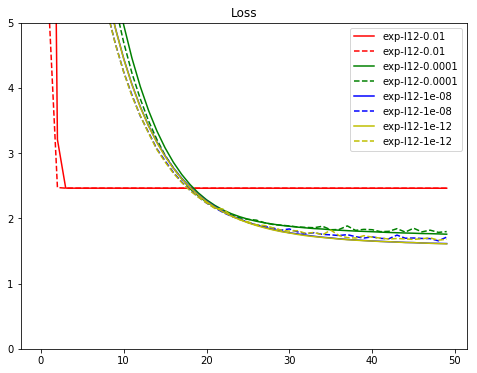

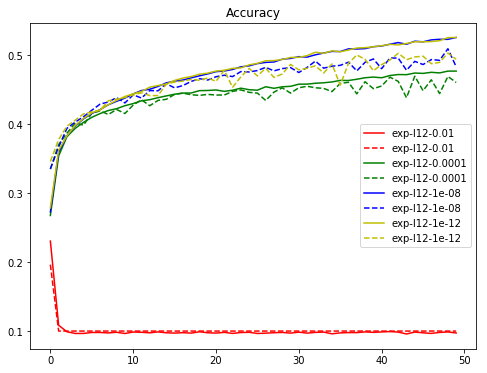

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()